In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

load dataset

In [3]:
df = pd.read_csv("/content/drive/MyDrive/PADHAI/Colab/Files/diamonds.csv")

Check information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
df.shape

(53940, 11)

Check for null value

In [6]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

Check for statstics

In [7]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Remove 0 value from x , y and z column

In [8]:
df[df.x == 0]['x'].count()

8

In [9]:
df[df.x == 0]['y'].count()

8

In [10]:
df[df.x == 0]['z'].count()

8

In [11]:
df= df[df['x'] != 0]
df= df[df['y'] != 0]
df= df[df['z'] != 0]

In [12]:
df.shape

(53920, 11)

In [13]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,26972.355731,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,15571.269010,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,1.000000,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,13487.750000,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,26973.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40457.250000,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


delete the column 'unnamed: 0'   
 
- Becuse this column is not usefull for analysis

In [14]:
df= df.drop('Unnamed: 0', axis = 1)

In [15]:
df.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


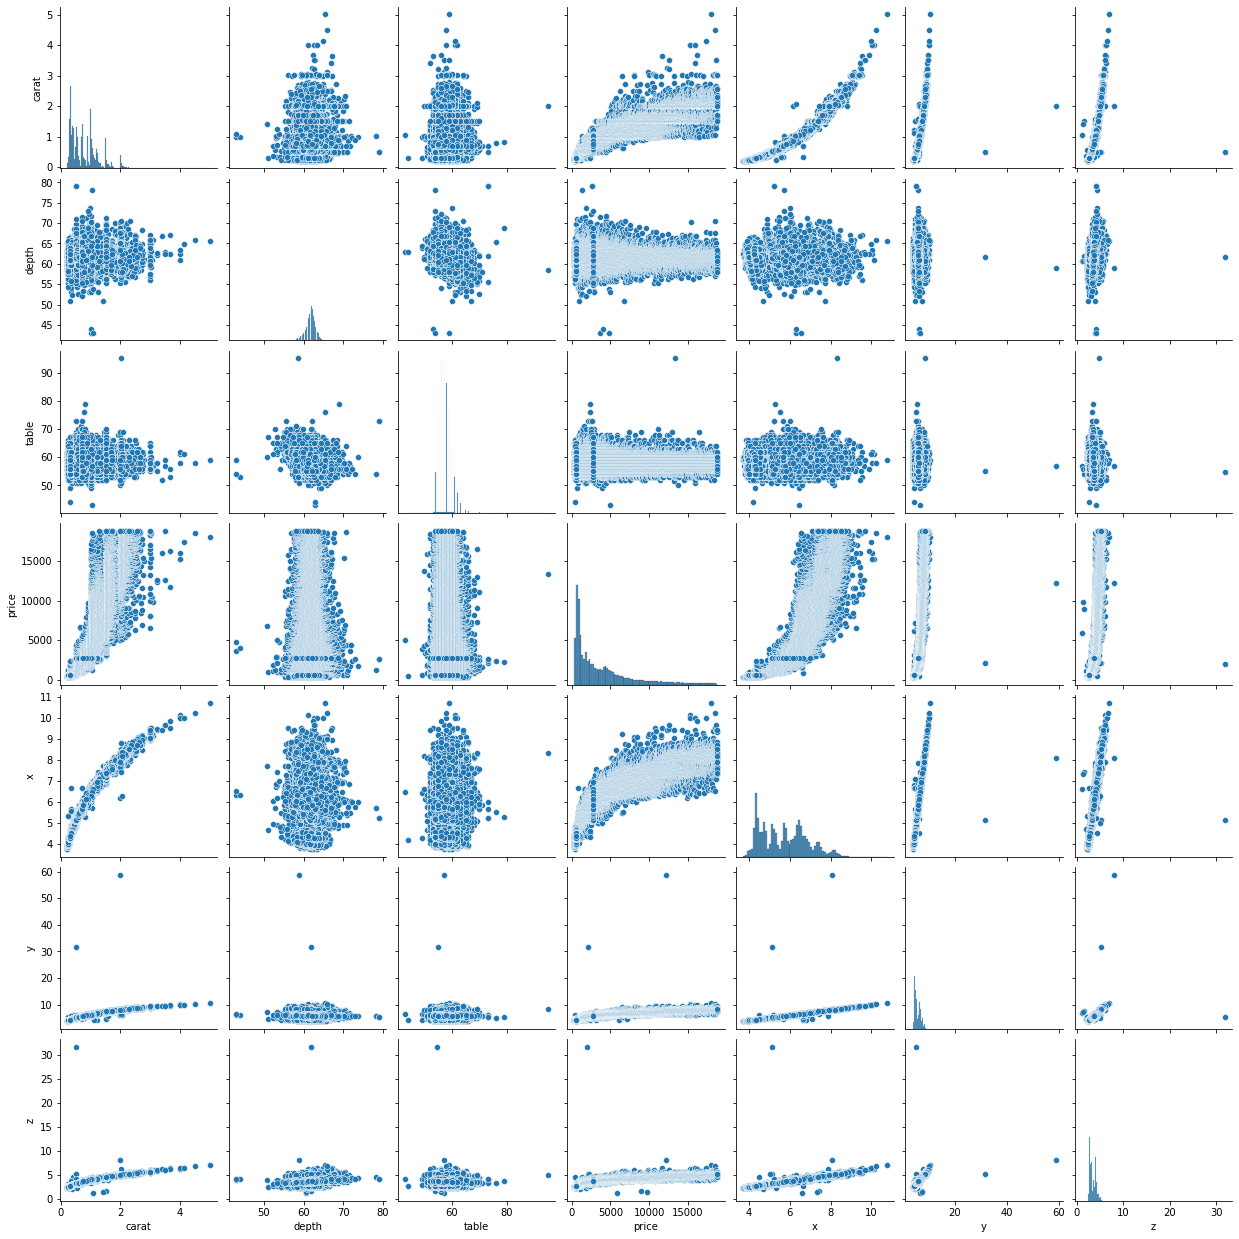

In [16]:
sns.pairplot(df)

- Here you can see the column x, y, and z having outlayer

Let's remove it

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


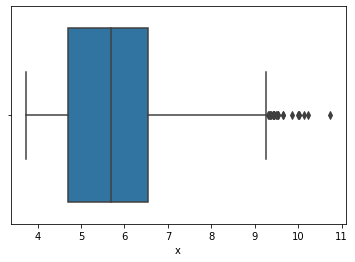

In [17]:
sns.boxplot(df.x)

Find the value for iqr


In [18]:
sorted(df.x)

[3.73,
 3.73,
 3.74,
 3.76,
 3.77,
 3.79,
 3.79,
 3.81,
 3.81,
 3.81,
 3.82,
 3.82,
 3.83,
 3.83,
 3.83,
 3.84,
 3.84,
 3.84,
 3.84,
 3.85,
 3.85,
 3.85,
 3.85,
 3.85,
 3.85,
 3.86,
 3.86,
 3.86,
 3.86,
 3.86,
 3.87,
 3.87,
 3.87,
 3.87,
 3.87,
 3.87,
 3.88,
 3.88,
 3.88,
 3.88,
 3.88,
 3.88,
 3.88,
 3.88,
 3.88,
 3.88,
 3.88,
 3.89,
 3.89,
 3.89,
 3.89,
 3.89,
 3.89,
 3.89,
 3.89,
 3.89,
 3.89,
 3.89,
 3.9,
 3.9,
 3.9,
 3.9,
 3.9,
 3.9,
 3.9,
 3.9,
 3.9,
 3.9,
 3.9,
 3.9,
 3.9,
 3.9,
 3.9,
 3.9,
 3.9,
 3.9,
 3.9,
 3.9,
 3.9,
 3.91,
 3.91,
 3.91,
 3.91,
 3.91,
 3.91,
 3.91,
 3.91,
 3.91,
 3.91,
 3.91,
 3.91,
 3.91,
 3.91,
 3.91,
 3.91,
 3.91,
 3.91,
 3.91,
 3.91,
 3.91,
 3.92,
 3.92,
 3.92,
 3.92,
 3.92,
 3.92,
 3.92,
 3.92,
 3.92,
 3.92,
 3.92,
 3.92,
 3.92,
 3.92,
 3.92,
 3.92,
 3.92,
 3.92,
 3.92,
 3.92,
 3.92,
 3.92,
 3.92,
 3.92,
 3.92,
 3.92,
 3.92,
 3.92,
 3.92,
 3.92,
 3.92,
 3.92,
 3.92,
 3.92,
 3.92,
 3.92,
 3.93,
 3.93,
 3.93,
 3.93,
 3.93,
 3.93,
 3.93,
 3.93,
 3.93,
 3.93,

In [19]:
q1, q3= np.percentile(df.x,[25,75])

In [20]:
q1

4.71

In [21]:
q3

6.54

In [22]:
iqr = q3-q1

In [23]:
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 

In [24]:
lower_bound

1.9649999999999999

In [25]:
upper_bound

9.285

In [26]:
df = df[(df.x >lower_bound)&(df.x < upper_bound) ]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


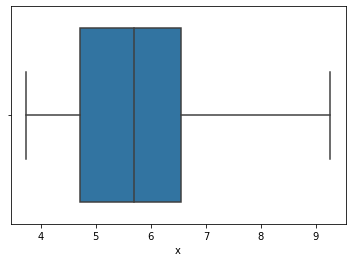

In [27]:
sns.boxplot(df.x)

Same things lets apply on y and z column

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


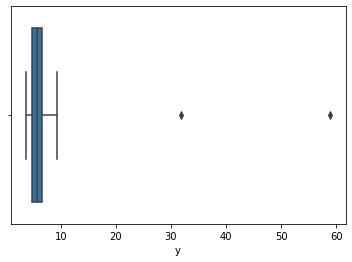

In [28]:
sns.boxplot(df.y)

In [29]:
sorted(df.y)

[3.68,
 3.71,
 3.71,
 3.72,
 3.73,
 3.75,
 3.77,
 3.77,
 3.78,
 3.78,
 3.78,
 3.78,
 3.78,
 3.8,
 3.81,
 3.82,
 3.83,
 3.84,
 3.84,
 3.84,
 3.84,
 3.84,
 3.85,
 3.85,
 3.85,
 3.85,
 3.86,
 3.86,
 3.86,
 3.87,
 3.88,
 3.88,
 3.88,
 3.88,
 3.89,
 3.89,
 3.89,
 3.89,
 3.89,
 3.89,
 3.89,
 3.89,
 3.89,
 3.9,
 3.9,
 3.9,
 3.9,
 3.9,
 3.9,
 3.9,
 3.9,
 3.9,
 3.9,
 3.9,
 3.91,
 3.91,
 3.91,
 3.91,
 3.92,
 3.92,
 3.92,
 3.92,
 3.92,
 3.92,
 3.92,
 3.92,
 3.92,
 3.92,
 3.92,
 3.92,
 3.93,
 3.93,
 3.93,
 3.93,
 3.93,
 3.93,
 3.93,
 3.93,
 3.93,
 3.93,
 3.93,
 3.93,
 3.93,
 3.93,
 3.93,
 3.93,
 3.93,
 3.94,
 3.94,
 3.94,
 3.94,
 3.94,
 3.94,
 3.94,
 3.94,
 3.94,
 3.94,
 3.94,
 3.94,
 3.94,
 3.94,
 3.94,
 3.94,
 3.94,
 3.94,
 3.94,
 3.94,
 3.94,
 3.94,
 3.95,
 3.95,
 3.95,
 3.95,
 3.95,
 3.95,
 3.95,
 3.95,
 3.95,
 3.95,
 3.95,
 3.95,
 3.95,
 3.95,
 3.95,
 3.95,
 3.95,
 3.95,
 3.95,
 3.95,
 3.95,
 3.95,
 3.95,
 3.95,
 3.95,
 3.95,
 3.95,
 3.95,
 3.95,
 3.95,
 3.95,
 3.95,
 3.95,
 3.95,
 3.95,
 3.9

In [30]:
q1, q3= np.percentile(df.y,[25,75])
iqr = q3-q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 
df = df[(df.y >lower_bound)&(df.y < upper_bound) ]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


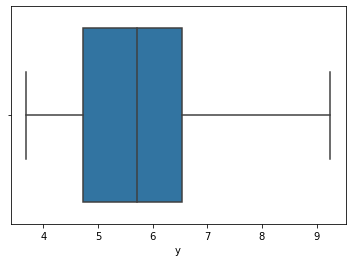

In [31]:
sns.boxplot(df.y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


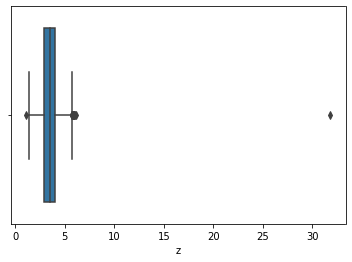

In [32]:
sns.boxplot(df.z)

In [33]:
sorted(df.z)

[1.07,
 1.41,
 1.53,
 2.06,
 2.24,
 2.25,
 2.26,
 2.27,
 2.28,
 2.29,
 2.3,
 2.3,
 2.31,
 2.31,
 2.31,
 2.31,
 2.31,
 2.31,
 2.32,
 2.32,
 2.32,
 2.33,
 2.33,
 2.33,
 2.33,
 2.33,
 2.33,
 2.33,
 2.34,
 2.34,
 2.35,
 2.35,
 2.35,
 2.35,
 2.35,
 2.36,
 2.36,
 2.36,
 2.36,
 2.36,
 2.36,
 2.36,
 2.36,
 2.36,
 2.36,
 2.36,
 2.37,
 2.37,
 2.37,
 2.37,
 2.37,
 2.37,
 2.37,
 2.38,
 2.38,
 2.38,
 2.38,
 2.38,
 2.38,
 2.38,
 2.38,
 2.38,
 2.38,
 2.38,
 2.38,
 2.38,
 2.39,
 2.39,
 2.39,
 2.39,
 2.39,
 2.39,
 2.39,
 2.39,
 2.39,
 2.39,
 2.39,
 2.39,
 2.39,
 2.39,
 2.39,
 2.39,
 2.39,
 2.39,
 2.39,
 2.4,
 2.4,
 2.4,
 2.4,
 2.4,
 2.4,
 2.4,
 2.4,
 2.4,
 2.4,
 2.4,
 2.4,
 2.4,
 2.4,
 2.4,
 2.4,
 2.4,
 2.4,
 2.4,
 2.4,
 2.4,
 2.41,
 2.41,
 2.41,
 2.41,
 2.41,
 2.41,
 2.41,
 2.41,
 2.41,
 2.41,
 2.41,
 2.41,
 2.41,
 2.41,
 2.41,
 2.41,
 2.41,
 2.41,
 2.41,
 2.41,
 2.41,
 2.41,
 2.41,
 2.41,
 2.41,
 2.41,
 2.41,
 2.42,
 2.42,
 2.42,
 2.42,
 2.42,
 2.42,
 2.42,
 2.42,
 2.42,
 2.42,
 2.42,
 2.42,
 2.42,
 

In [34]:
q1, q3= np.percentile(df.z,[25,75])
iqr = q3-q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 
df = df[(df.z >lower_bound)&(df.z < upper_bound) ]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


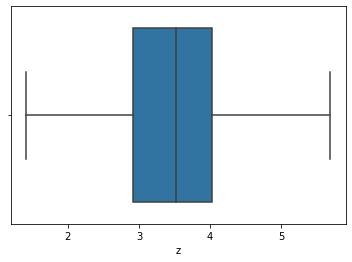

In [35]:
sns.boxplot(df.z)

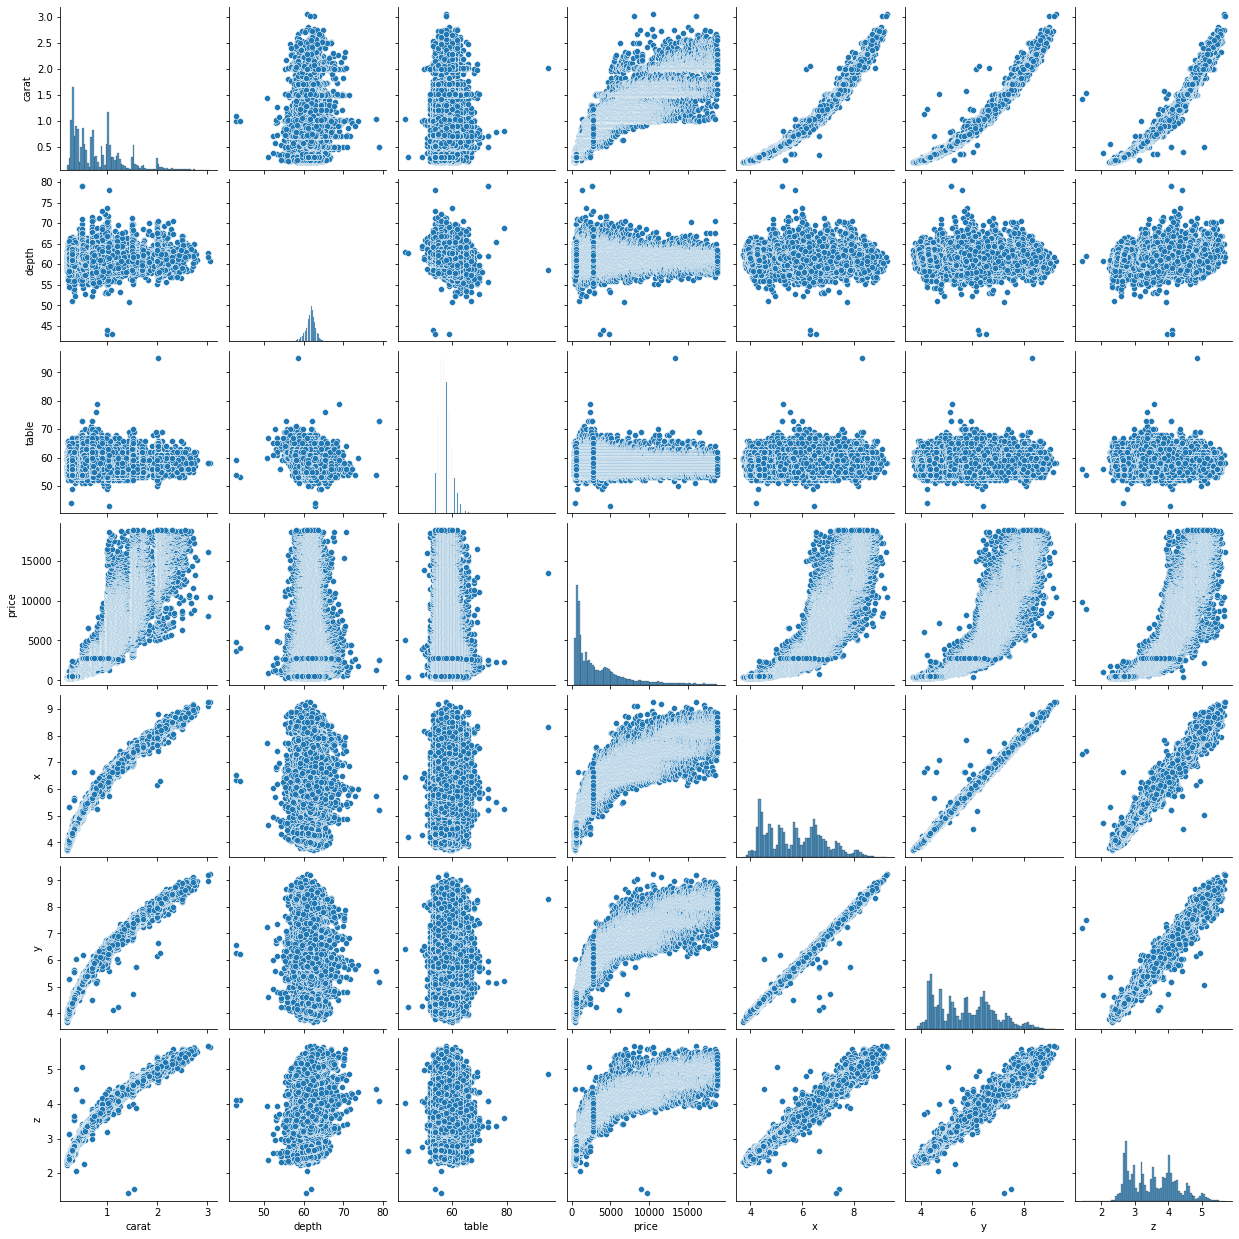

In [36]:
sns.pairplot(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


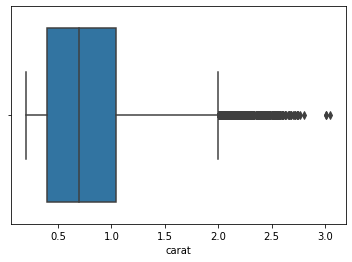

In [37]:
sns.boxplot(df.carat)

In [38]:
sorted(df.carat)

[0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.21,
 0.21,
 0.21,
 0.21,
 0.21,
 0.21,
 0.21,
 0.21,
 0.21,
 0.22,
 0.22,
 0.22,
 0.22,
 0.22,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.2

In [39]:
q1, q3= np.percentile(df.carat,[25,75])
iqr = q3-q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 
df = df[(df.carat > lower_bound)&(df.carat < upper_bound) ]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


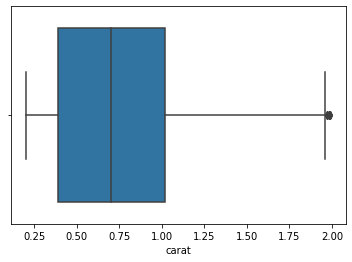

In [40]:
sns.boxplot(df.carat)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


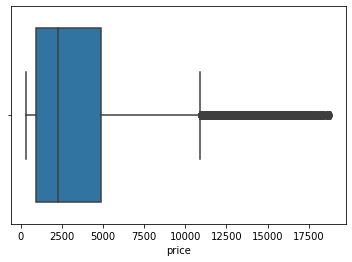

In [41]:
sns.boxplot(df.price)

In [42]:
sorted(df.price)
q1, q3= np.percentile(df.price,[25,75])
iqr = q3-q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 
df = df[(df.price > lower_bound)&(df.price < upper_bound) ]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


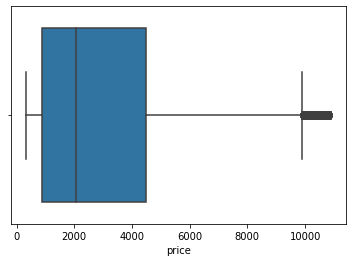

In [43]:
sns.boxplot(df.price)

In [44]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


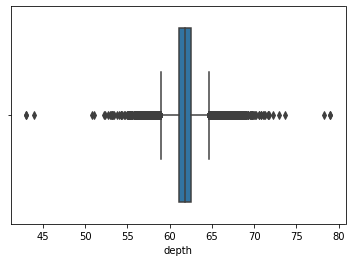

In [45]:
sns.boxplot(df.depth)

In [46]:
sorted(df.depth)
q1, q3= np.percentile(df.depth,[25,75])
iqr = q3-q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 
df = df[(df.depth > lower_bound)&(df.depth < upper_bound) ]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


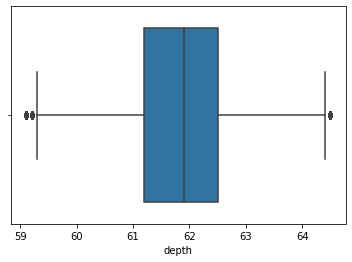

In [47]:
sns.boxplot(df.depth)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


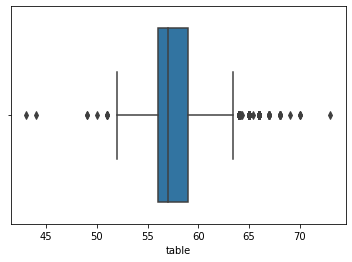

In [48]:
sns.boxplot(df.table)

In [49]:
sorted(df.table)
q1, q3= np.percentile(df.table,[25,75])
iqr = q3-q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 
df = df[(df.table > lower_bound)&(df.table < upper_bound) ]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


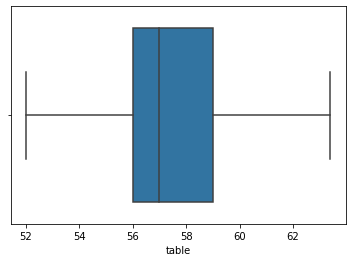

In [50]:
sns.boxplot(df.table)

In [51]:
df.to_csv('/content/drive/MyDrive/PADHAI/Colab/Files/Dimond_Clean_data.csv', index=False)

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


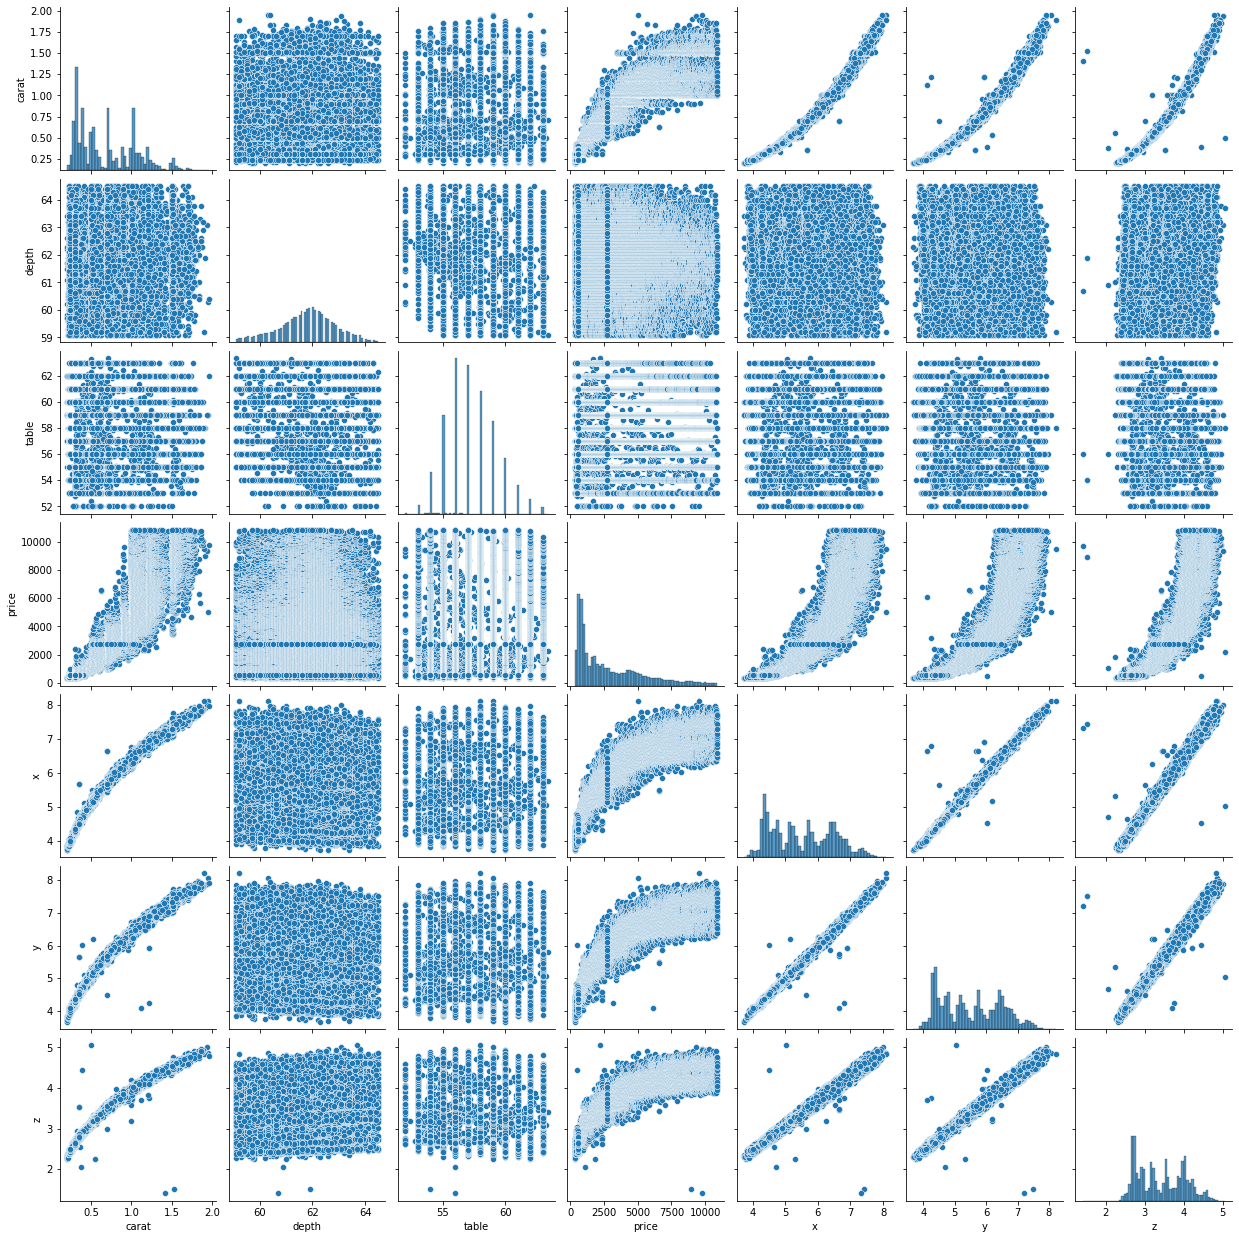

In [53]:
sns.pairplot(df)

lets check with different cut type

In [54]:
pd.unique(df.cut)

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [55]:
pd.unique(df.carat)

array([0.23, 0.21, 0.29, 0.31, 0.24, 0.26, 0.3 , 0.22, 0.2 , 0.32, 0.33,
       0.25, 0.35, 0.42, 0.28, 0.38, 0.7 , 0.71, 0.78, 0.73, 0.8 , 0.75,
       0.74, 0.59, 0.9 , 0.91, 0.61, 0.77, 0.63, 0.76, 0.64, 0.72, 0.79,
       0.58, 1.17, 0.6 , 0.54, 0.52, 1.01, 0.51, 0.83, 1.05, 0.81, 0.55,
       0.87, 0.57, 0.82, 0.96, 1.04, 1.  , 0.53, 0.93, 0.34, 0.36, 0.84,
       0.89, 1.02, 0.86, 0.97, 0.56, 0.85, 0.92, 1.27, 1.2 , 0.66, 1.12,
       0.68, 1.03, 0.62, 1.22, 1.08, 0.5 , 0.95, 0.39, 0.65, 1.24, 0.27,
       0.41, 1.06, 0.69, 0.88, 0.4 , 1.14, 0.94, 0.98, 1.29, 1.13, 1.23,
       0.67, 1.11, 1.1 , 1.18, 1.15, 1.25, 1.07, 1.28, 1.21, 1.09, 1.5 ,
       1.51, 1.19, 1.52, 1.16, 0.37, 1.31, 1.39, 0.99, 1.35, 1.3 , 1.32,
       1.26, 0.43, 1.34, 1.44, 1.58, 1.54, 1.36, 1.38, 1.33, 1.74, 1.64,
       1.4 , 1.55, 1.95, 1.37, 1.62, 1.57, 1.69, 1.66, 1.49, 1.46, 1.53,
       1.85, 1.68, 1.56, 1.7 , 1.59, 1.42, 1.48, 1.47, 1.83, 1.45, 1.71,
       1.43, 1.41, 1.65, 1.72, 1.6 , 1.61, 1.73, 1.

What is the relationship between carat and price?

find out the max and min values for price and carat

In [56]:
print('max value for carat', df.carat.max())
print('min value for carat', df.carat.min())
print('max value for price', df.price.max())
print('min value for price', df.price.min())

max value for carat 1.96
min value for carat 0.2
max value for price 10873
min value for price 326


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


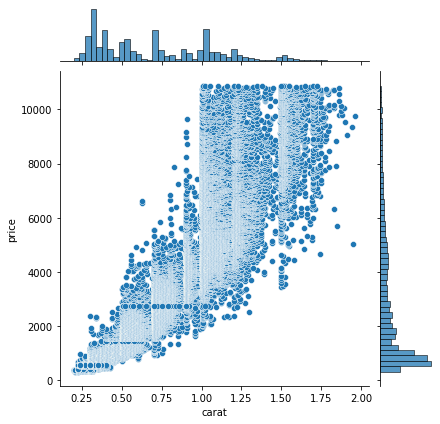

In [57]:
sns.jointplot('carat','price', data = df)

- when carat value is incerase price is also linearly incerase.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


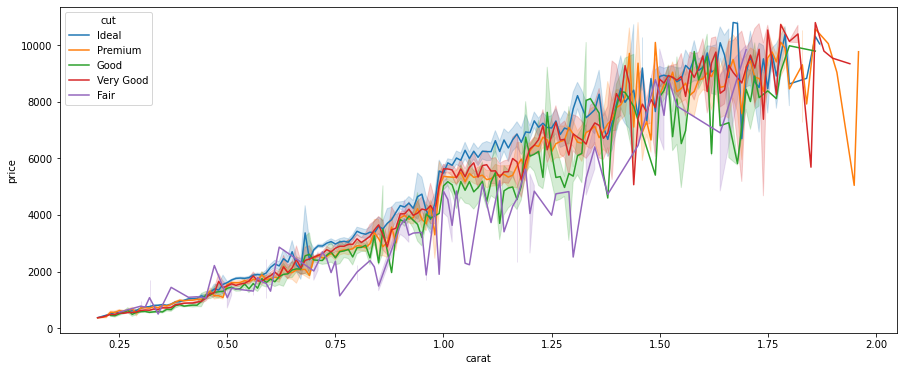

In [58]:
fig = plt.gcf();
fig.set_size_inches(15,6);
sns.lineplot('carat','price',
             hue = 'cut', 
             data = df,
             #palette = 'Reds',
             hue_order = ['Ideal','Premium','Good','Very Good','Fair']);

Which cut majarly buy?

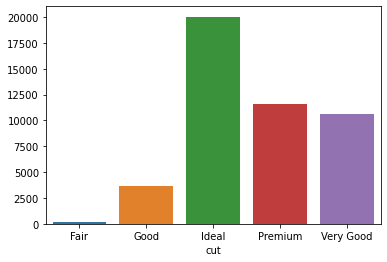

In [59]:
c = df.groupby('cut')['cut'].count()
sns.barplot(x=c.index, y=c.values);

#Check the relation between cut and price

In [60]:
df1= df.copy()

In [61]:
df1.drop(['carat', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], axis=1, inplace=True)

In [62]:
df1

,cut,price
0,Ideal,326
1,Premium,326
3,Premium,334
4,Good,335
5,Very Good,336
...,...,...
53935,Ideal,2757
53936,Good,2757
53937,Very Good,2757
53938,Premium,2757


In [63]:
df1_f = df1[(df1['cut'] == 'fair')]
df1_I = df1[(df1['cut'] == 'Ideal')]
df1_g = df1[(df1['cut'] == 'Good')]
df1_p = df1[(df1['cut'] == 'Premium')]
df1_vg = df1[(df1['cut'] == 'Very Good')]

In [64]:
print('shape of Fair',df1_f.shape)
print('shape of Ideal',df1_I.shape)
print('shape of Good',df1_g.shape)
print('shape of Very Good',df1_vg.shape)
print('shape of Premium',df1_p.shape)

shape of Fair (0, 2)
shape of Ideal (20028, 2)
shape of Good (3628, 2)
shape of Very Good (10660, 2)
shape of Premium (11622, 2)


In [65]:
print('shape of Fair',df1_f.mean(), df1_f.median())
print('shape of Ideal',df1_I.mean(), df1_I.median())
print('shape of Good',df1_g.mean(), df1_g.median())
print('shape of Very Good',df1_vg.mean(), df1_vg.median())
print('shape of Premium',df1_p.mean(), df1_p.median())

shape of Fair cut      NaN
price    NaN
dtype: object cut      NaN
price    NaN
dtype: object
shape of Ideal price    2674.326593
dtype: float64 price    1656.0
dtype: float64
shape of Good price    3119.969129
dtype: float64 price    2569.0
dtype: float64
shape of Very Good price    3104.277767
dtype: float64 price    2352.0
dtype: float64
shape of Premium price    3303.288935
dtype: float64 price    2444.0
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 12.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease t

Text(0.5, 1.0, 'Very Good cut')

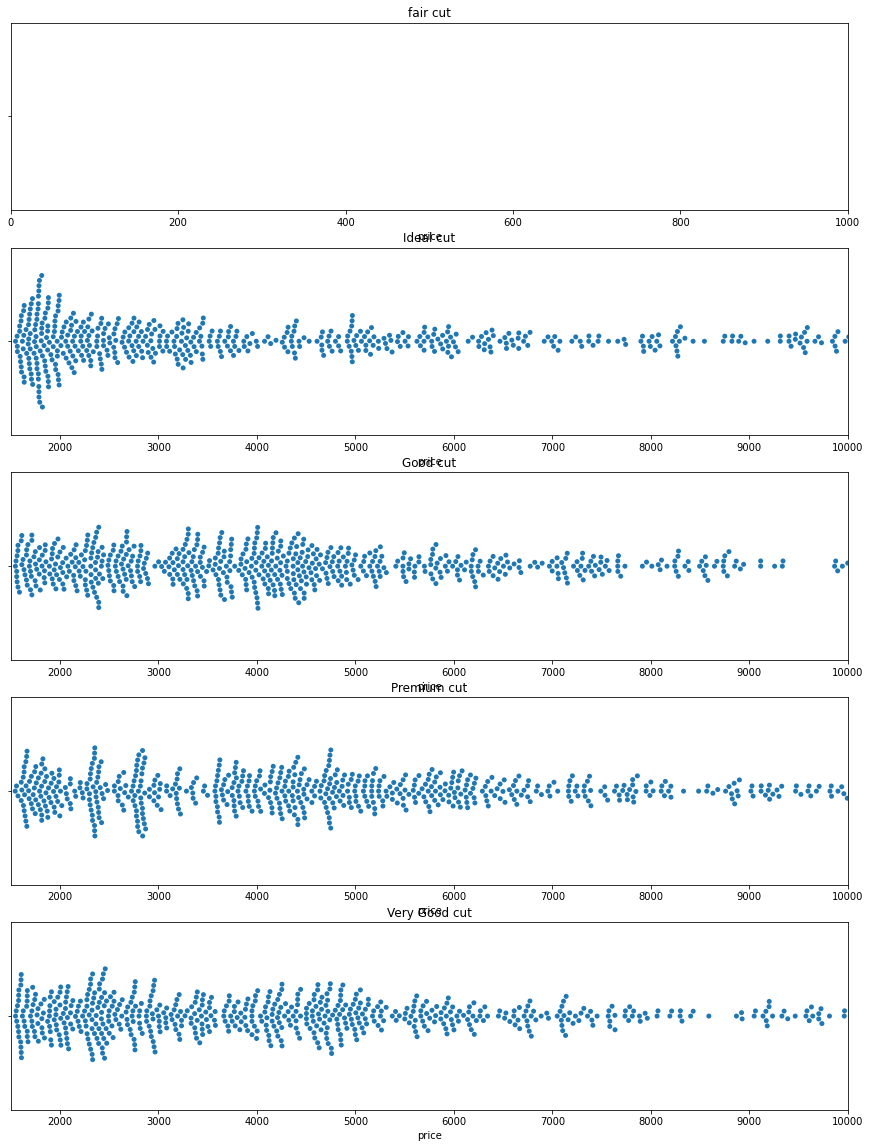

In [66]:
fig, axs = plt.subplots(nrows = 5)
fig.set_size_inches(15,20)   # change the size of graph

p1 = sns.swarmplot(df1_f.price, ax = axs[0])
p1.set(xlim = (0, 1000))
p1.set_title('fair cut')

p2 = sns.swarmplot(df1_I.sample(1000).price, ax = axs[1])
p2.set(xlim = (1500, 10000))
p2.set_title('Ideal cut')

p3 = sns.swarmplot(df1_g.sample(1000).price, ax = axs[2])
p3.set(xlim = (1500, 10000))
p3.set_title('Good cut')

p4 = sns.swarmplot(df1_p.sample(1000).price, ax = axs[3])
p4.set(xlim = (1500, 10000))
p4.set_title('Premium cut')

p5 = sns.swarmplot(df1_vg.sample(1000).price, ax = axs[4])
p5.set(xlim = (1500, 10000))
p5.set_title('Very Good cut')